In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import json

In [125]:
# Anem a veure la classificació de les notícies de Desembre
df_desembre = pd.read_csv('..//datasets//2024_desembre_dataset.csv', low_memory=False)

In [126]:
# load a json into a df
with open("classificacio.json", "r") as file:
    data = json.load(file)

# Convert to DataFrame
df_classificacio = pd.DataFrame.from_dict(data, orient="index").reset_index()

# Rename columns
df_classificacio.columns = ["id", "tema"]

print(df_classificacio)


           id     tema
0     3213484   altres
1     3269494   altres
2     3287193   altres
3     3313330   altres
4     3315570   altres
...       ...      ...
2388  3329040   altres
2389  3329041  guerres
2390  3329042   altres
2391  3329043  guerres
2392  3329044   altres

[2393 rows x 2 columns]


In [127]:
# Ara afegirem la columna tema al dataset de desembre
df_classificacio["id"] = df_classificacio["id"].astype(str)
df_desembre["id"] = df_desembre["id"].astype(str) 

df = df_desembre.merge(df_classificacio, on="id", how="left")

In [128]:
# Normalitzar la columna 'tema'
df['tema'] = df['tema'].replace('política', 'politica')

<Figure size 1200x600 with 0 Axes>

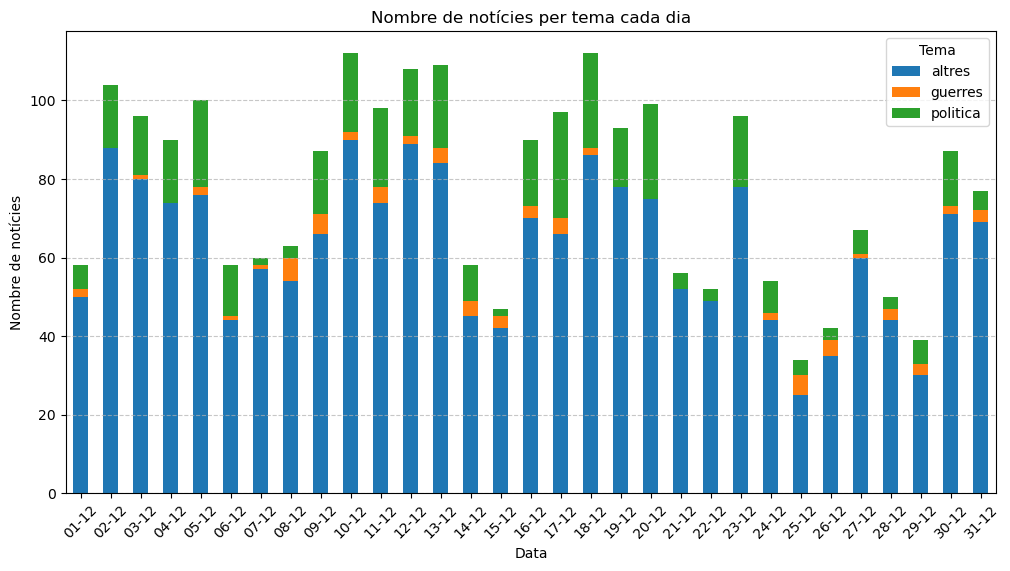

In [129]:
# Convertir la columna 'data' a tipus datetime
df['data'] = pd.to_datetime(df['data'])

# Comptar el nombre de notícies per dia i per tema
df_grouped = df.groupby(['data', 'tema']).size().unstack(fill_value=0)

# Reformatejar la columna data per mostrar només dia i mes
df_grouped.index = df_grouped.index.strftime('%d-%m')

# Crear el gràfic
plt.figure(figsize=(12, 6))
df_grouped.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e', '#2ca02c'], figsize=(12, 6))

plt.xlabel('Data')
plt.ylabel('Nombre de notícies')
plt.title('Nombre de notícies per tema cada dia')
plt.legend(title='Tema')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [130]:
# Comptem el nombnre de notícies per tema sobre el total
df_grouped = df.groupby(['tema']).size()


In [131]:
df_grouped

tema
altres      1945
guerres       69
politica     379
dtype: int64

In [132]:
# Quines son les tags més repetides en el dataset?
import ast
from collections import Counter


# Quins tags es repeteixen mes?
def extract_ids(tag_str):
    try:
        tag_list = ast.literal_eval(tag_str)  
        return [tag['id'] for tag in tag_list]  
    except (ValueError, SyntaxError):
        return []  

all_ids = sum(df["tags"].apply(extract_ids).tolist(), [])

id_counts = Counter(all_ids)

id_counts_df = pd.DataFrame(id_counts.items(), columns=['id', 'count']).sort_values(by='count', ascending=False)

print(id_counts_df)

               id  count
2    METEOROLOGIA     49
21          SALUT     42
96       POLICIAL     41
23         MUSICA     35
115         SIRIA     35
..            ...    ...
259            AN      1
258     COREANORD      1
257   LULADASILVA      1
161         CEUTA      1
351  JUANMAMORENO      1

[352 rows x 2 columns]


In [133]:
print(id_counts_df.head(30))

               id  count
2    METEOROLOGIA     49
21          SALUT     42
96       POLICIAL     41
23         MUSICA     35
115         SIRIA     35
47        TRANSIT     33
55    ESTATSUNITS     28
114        MOSSOS     28
71         FRANCA     27
5           NADAL     26
127      JUDICIAL     26
84      MOBILITAT     24
121        CINEMA     23
74      HABITATGE     22
13    MEDIAMBIENT     21
107   XARXASOCIAL     19
36            ERC     18
29         RUSSIA     18
28   PAISVALENCIA     18
125    VMASCLISTA     18
1        PSANCHEZ     17
131   TRANSPUBLIC     17
78    AGRESSIOSEX     16
87      ELSDINERS     16
137        ISRAEL     16
0            PSOE     16
24        TURISME     16
149            PP     14
48         HFLICK     14
18        CIENCIA     13


In [134]:
df_noticies = df[df['data'] == '2024-12-10']

In [135]:
df_noticies.reset_index(drop=True, inplace=True)

In [136]:
# Comptem quants temes hi ha de cada per un dia concret
df["data"] = pd.to_datetime(df["data"])

# Filter for the specific date
target_date = "2024-12-10"
filtered_df = df[df["data"] == target_date]

# Count occurrences of each "tema"
tema_counts = filtered_df["tema"].value_counts()

print(tema_counts)

tema
altres      90
politica    20
guerres      2
Name: count, dtype: int64


In [137]:
pd.set_option("display.max_colwidth", None)  # Show full content of text columns
i = 0

In [138]:
print(df_noticies.loc[i, ["titol", "tema"]])
i +=1

titol    Crida dels rebels sirians per trobar els responsables de les tortures del règim
tema                                                                             guerres
Name: 0, dtype: object


In [139]:
############# SENTIMENTS

In [140]:
# load a json into a df
with open("nervis.json", "r") as file:
    data = json.load(file)

# Convert to DataFrame
df_nervis = pd.DataFrame.from_dict(data, orient="index").reset_index()



In [141]:
# Rename columns
df_nervis.columns = ["id", "efecte", "justificacio"]

In [142]:
# Ara afegirem la columna tema al dataset de desembre
df_nervis["id"] = df_nervis["id"].astype(str)

df_desembre_nervis = df_desembre[df_desembre["id"].isin(df_nervis["id"])]

In [143]:
df_desembre_nervis["id"] = df_desembre_nervis["id"].astype(str)

df_desembre_nervis = df_desembre_nervis.merge(df_nervis, on="id", how="left")

C:\Users\marti\AppData\Local\Temp\ipykernel_10212\1325361259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_desembre_nervis["id"] = df_desembre_nervis["id"].astype(str)


In [146]:
len(df_desembre_nervis)

60